**Part 1 ‑ Exploratory data analysis**

The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15­minute time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Read in the data
dflogins = pd.read_json('logins.json')
dflogins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [6]:
logins = dflogins.sort_values(['login_time'], kind='mergesort', ascending=False)
print(logins)

               login_time
93140 1970-04-13 18:57:38
93141 1970-04-13 18:54:23
93139 1970-04-13 18:54:02
93137 1970-04-13 18:50:19
93136 1970-04-13 18:48:52
...                   ...
2     1970-01-01 20:16:37
3     1970-01-01 20:16:36
1     1970-01-01 20:16:10
0     1970-01-01 20:13:18
6     1970-01-01 20:12:16

[93142 rows x 1 columns]


In [7]:
# data quality check
dflogins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [8]:
dflogins.set_index('login_time', inplace=True)
dflogins['count'] = 1

In [9]:
# aggregate based on 15 minute time intervals
df15min = dflogins.resample('15T', label='right').sum()
df15min.head()

,count
login_time,
1970-01-01 20:15:00,2
1970-01-01 20:30:00,6
1970-01-01 20:45:00,9
1970-01-01 21:00:00,7
1970-01-01 21:15:00,1


In [10]:
logins15min = df15min.sort_values(['login_time'], kind='mergesort', ascending=False)
print(logins15min)

                     count
login_time                
1970-04-13 19:00:00      6
1970-04-13 18:45:00      7
1970-04-13 18:30:00      2
1970-04-13 18:15:00      5
1970-04-13 18:00:00      5
...                    ...
1970-01-01 21:15:00      1
1970-01-01 21:00:00      7
1970-01-01 20:45:00      9
1970-01-01 20:30:00      6
1970-01-01 20:15:00      2

[9788 rows x 1 columns]


In [13]:
df15min.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:15:00 to 1970-04-13 19:00:00
Freq: 15T
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   count   9788 non-null   int64
dtypes: int64(1)
memory usage: 152.9 KB


In [14]:
# Filling missing value with 0
df15min = df15min.fillna(0)

In [15]:
df15min.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:15:00 to 1970-04-13 19:00:00
Freq: 15T
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   count   9788 non-null   int64
dtypes: int64(1)
memory usage: 152.9 KB


In [16]:
# Extract features from the dataset
df15min['time'] = pd.to_datetime(df15min.index)

In [18]:
df15min['month'] = df15min.time.dt.month
df15min['day'] = df15min.time.dt.day
df15min['hour'] = df15min.time.dt.hour
df15min['week'] = df15min.time.dt.week

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  after removing the cwd from sys.path.


In [19]:
df15min.head()

,count,time,month,day,hour,week
login_time,,,,,,
1970-01-01 20:15:00,2,1970-01-01 20:15:00,1,1,20,1
1970-01-01 20:30:00,6,1970-01-01 20:30:00,1,1,20,1
1970-01-01 20:45:00,9,1970-01-01 20:45:00,1,1,20,1
1970-01-01 21:00:00,7,1970-01-01 21:00:00,1,1,21,1
1970-01-01 21:15:00,1,1970-01-01 21:15:00,1,1,21,1


In [20]:
# Group by month
print (df15min.groupby('month')['count'].aggregate(np.sum))

month
1    21225
2    24669
3    33727
4    13521
Name: count, dtype: int64


(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

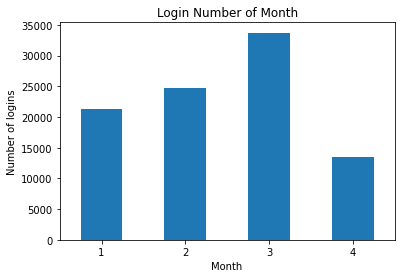

In [21]:
df15min.groupby('month')['count'].sum().plot(kind='bar')
plt.title("Login Number of Month")
plt.xlabel("Month")
plt.ylabel("Number of logins")
plt.xticks(rotation=0)

In [22]:
print (df15min.groupby('week')['count'].aggregate(np.sum))

week
1     2368
2     5218
3     5021
4     4750
5     4747
6     5564
7     5914
8     7038
9     6554
10    7400
11    7329
12    8959
13    7284
14    8096
15    6496
16     404
Name: count, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

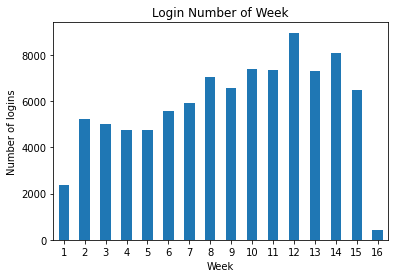

In [23]:
df15min.groupby('week')['count'].sum().plot(kind='bar')
plt.title("Login Number of Week")
plt.xlabel("Week")
plt.ylabel("Number of logins")
plt.xticks(rotation=0)

In [24]:
# Aggregate login counts based on 1 day time intervals
df_day = dflogins.resample('D').sum()
df_day.head()

,count
login_time,
1970-01-01,112
1970-01-02,681
1970-01-03,793
1970-01-04,788
1970-01-05,459


In [25]:
df_day['date'] = pd.to_datetime(df_day.index)
df_day['weekday'] = df_day.date.dt.weekday
df_day.head()

,count,date,weekday
login_time,,,
1970-01-01,112,1970-01-01,3
1970-01-02,681,1970-01-02,4
1970-01-03,793,1970-01-03,5
1970-01-04,788,1970-01-04,6
1970-01-05,459,1970-01-05,0


[Text(0, 0, 'Monday'),
 Text(0, 0, 'Tuesday'),
 Text(0, 0, 'Wednesday'),
 Text(0, 0, 'Thursday'),
 Text(0, 0, 'Friday'),
 Text(0, 0, 'Saturday'),
 Text(0, 0, 'Sunday')]

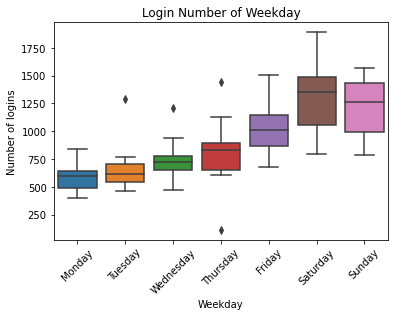

In [27]:
import seaborn as sns
import calendar
ax = sns.boxplot(x='weekday', y='count', data=df_day)
plt.title("Login Number of Weekday")
plt.xlabel("Weekday")
plt.ylabel("Number of logins")
plt.xticks(rotation=45)
ax.set_xticklabels([calendar.day_name[d] for d in range(7)])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 <a list of 24 Text major ticklabel objects>)

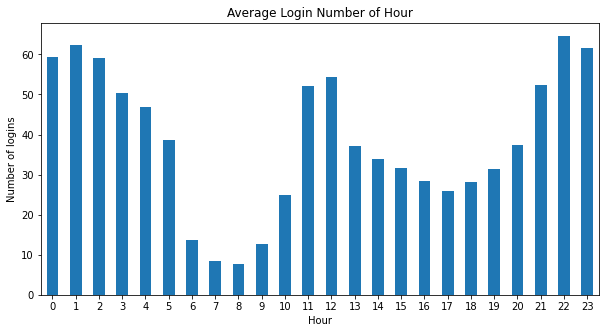

In [29]:
# Group by hour
nday = 30+28+30+13   # total days
(df15min.groupby('hour')['count'].sum()/nday).plot(kind='bar', figsize=(10,5))
plt.title("Average Login Number of Hour")
plt.xlabel("Hour")
plt.ylabel("Number of logins")
plt.xticks(rotation=0)

In [30]:
# Aggregate login counts based on 1-hour time intervals
df_hour = dflogins.resample('H').sum()
df_hour.head()

,count
login_time,
1970-01-01 20:00:00,24
1970-01-01 21:00:00,9
1970-01-01 22:00:00,21
1970-01-01 23:00:00,58
1970-01-02 00:00:00,53


In [31]:
df_hour['time'] = pd.to_datetime(df_hour.index)
df_hour['hour'] = df_hour.time.dt.hour
df_hour.head()

,count,time,hour
login_time,,,
1970-01-01 20:00:00,24,1970-01-01 20:00:00,20
1970-01-01 21:00:00,9,1970-01-01 21:00:00,21
1970-01-01 22:00:00,21,1970-01-01 22:00:00,22
1970-01-01 23:00:00,58,1970-01-01 23:00:00,23
1970-01-02 00:00:00,53,1970-01-02 00:00:00,0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 <a list of 24 Text major ticklabel objects>)

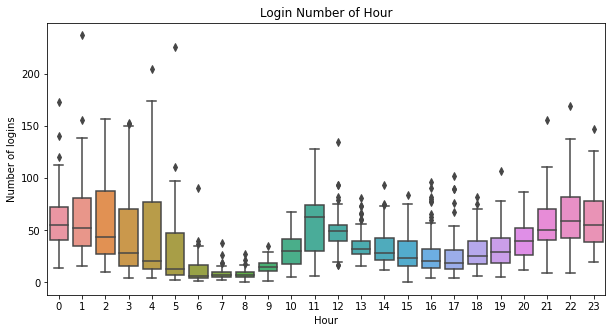

In [32]:
sns.mpl.rc("figure", figsize=(10,5))
sns.boxplot(x='hour', y='count', data=df_hour)
plt.title("Login Number of Hour")
plt.xlabel("Hour")
plt.ylabel("Number of logins")
plt.xticks(rotation=0)

**Conclusions:**

Login counts increase from January to March and reached the highest amount in March.

In a week's time, login counts rised and droped a little. Logins in week 12 are the most. It is the last week of March. Logins in week 14 are the second most. It is the second week of April.

Login increase from Monday to Saturday. There are more logins on weekends than there are on weekdays. Logins on Saturday are the most, and logins on Sunday run second, and logins on Friday are the third. Login numbers on weekends varied most.

There are more logins at night. 10 PM to 2 AM seems to be the peak. Least logins in the moring. There are more logins at noon than in the afternoon. Login counts varied most from 2 AM to 4 AM.